***Pranjal Shikhar Sinha***

# Task 2 - To Explore Supervised Machine Learning

# Problem : 

In this regression task we will predict the percentage of marks that a student is expected to score based upon the
number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [2]:
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import plotly.offline as pyo
import cufflinks as cf
from plotly.offline import init_notebook_mode,plot,iplot

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score

In [3]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [4]:
url = 'http://bit.ly/w-data'

In [6]:
data = pd.read_csv(url)

In [7]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [8]:
data.shape

(25, 2)

In [9]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


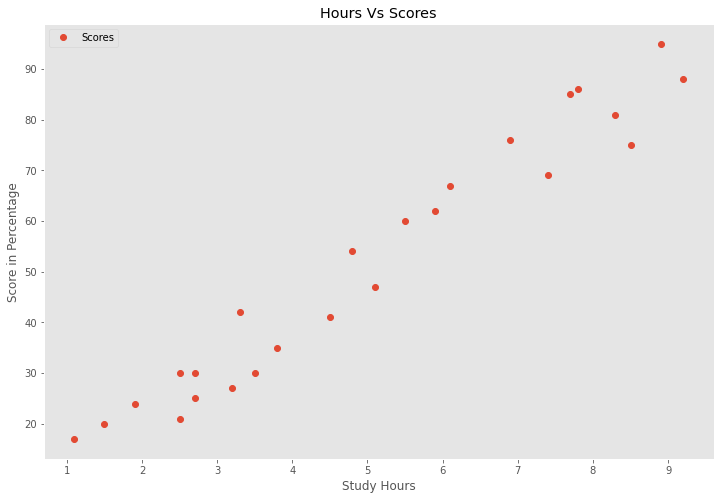

In [12]:
data.plot(x="Hours", y="Scores", style= 'o', figsize = (12,8))
plt.title("Hours Vs Scores")
plt.xlabel("Study Hours")
plt.ylabel("Score in Percentage")
plt.grid()
plt.show()

In [14]:
x = data.iloc[:, :-1].values
y = data.iloc[:,1].values
x
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.2, random_state=0)

In [16]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

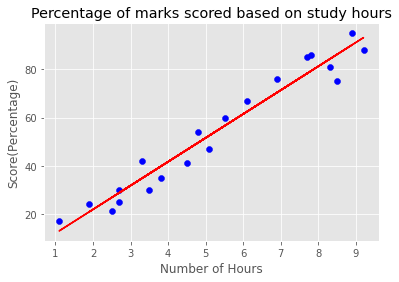

In [17]:
plt.scatter(x_train,y_train,color="blue")
plt.plot(x_train,regr.predict(x_train), color="Red")
plt.title("Percentage of marks scored based on study hours")
plt.xlabel("Number of Hours")
plt.ylabel("Score(Percentage)")
plt.show()

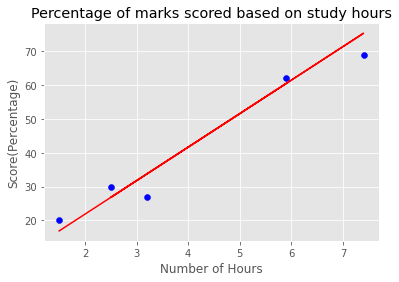

In [18]:
plt.scatter(x_test,y_test,color="blue")
plt.plot(x_test,regr.predict(x_test), color="Red")
plt.title("Percentage of marks scored based on study hours")
plt.xlabel("Number of Hours")
plt.ylabel("Score(Percentage)")
plt.show()

In [19]:
print(x_test)
y_predict = regr.predict(x_test)
y_predict

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [20]:
df_mks = pd.DataFrame({"Actual":y_test, "Predicted":y_predict})
df_mks

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [21]:
no_hrs = 9.25
print("Number of hours the student studied: ",no_hrs)
print("Predicted score for the student: ",regr.predict(np.array(no_hrs).reshape(1,-1))[0])

Number of hours the student studied:  9.25
Predicted score for the student:  93.69173248737538
